In [1476]:
import pandas as pd

In [1477]:
df_states=pd.read_csv('dim_states_codes.csv')


In [1478]:
df1 = pd.read_csv('constituency_wise_results_2014.csv')
df1

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282
2,Andhra Pradesh,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282
3,Andhra Pradesh,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282
4,Andhra Pradesh,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282
...,...,...,...,...,...,...,...,...,...,...,...,...
8350,Puducherry,Puducherry,PUVALA NAGESWARA RAO,M,60.0,GEN,IND,Sewing Machine,465,0,465,901357
8351,Puducherry,Puducherry,K. MANJINI,M,41.0,GEN,IND,Coconut,767,0,767,901357
8352,Puducherry,Puducherry,R. VALAVAN,M,40.0,GEN,IND,Carrom Board,497,0,497,901357
8353,Puducherry,Puducherry,V. VIJAYA,F,29.0,GEN,IND,Green Chilli,746,0,746,901357


In [1479]:
df2 = pd.read_csv('constituency_wise_results_2019.csv')
df2

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Aruku,KISHORE CHANDRA DEO,MALE,72.0,ST,TDP,Bicycle,336163,1938,338101,1451418
1,Andhra Pradesh,Aruku,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,MALE,54.0,ST,BJP,Lotus,17578,289,17867,1451418
2,Andhra Pradesh,Aruku,GODDETI. MADHAVI,FEMALE,26.0,ST,YSRCP,Ceiling Fan,557561,4629,562190,1451418
3,Andhra Pradesh,Aruku,SHRUTI DEVI VYRICHERLA,FEMALE,46.0,ST,INC,Hand,17656,74,17730,1451418
4,Andhra Pradesh,Aruku,GANGULAIAH VAMPURU.,MALE,49.0,ST,JnP,Glass Tumbler,42245,549,42794,1451418
...,...,...,...,...,...,...,...,...,...,...,...,...
8592,Puducherry,Puducherry,TIRAVITAMANKAI@LOURDHUMARY,FEMALE,57.0,GENERAL,IND,Slate,870,0,870,973410
8593,Puducherry,Puducherry,IMS. BALAJI,MALE,32.0,GENERAL,IND,Bat,2546,0,2546,973410
8594,Puducherry,Puducherry,RAMESH.D,MALE,49.0,SC,IND,Mike,1653,0,1653,973410
8595,Puducherry,Puducherry,V. RAMAMURTHI,MALE,74.0,GENERAL,IND,Whistle,641,1,642,973410


# DATA CLEANING (Results 2014)

In [1480]:
df1= df1.dropna()

In [1481]:
 df1.state.replace("Andhra Pradesh","Telangana", inplace=True)

C:\Users\chris\AppData\Local\Temp\ipykernel_17904\1804269706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.state.replace("Andhra Pradesh","Telangana", inplace=True)


In [1482]:
distritos_multiples_estados = df1.groupby('pc_name')['state'].nunique()

distritos_conflictivos = distritos_multiples_estados[distritos_multiples_estados > 1]
print(distritos_conflictivos)


pc_name
Aurangabad     2
Hamirpur       2
Maharajganj    2
Name: state, dtype: int64


In [1483]:
df_conflictivos = df1[df1['pc_name'].isin(distritos_conflictivos.index)]
#df_conflictivos.groupby('state').first()

df_conflictivos


,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
1130,Bihar,Maharajganj,"JANARDAN SINGH ""SIGRIWAL""",M,50.0,GEN,BJP,Lotus,320645,108,320753,1642068
1131,Bihar,Maharajganj,NAGENDRA PRASAD,M,49.0,GEN,BSP,Elephant,11187,2,11189,1642068
1132,Bihar,Maharajganj,PRABHU NATH SINGH,M,61.0,GEN,RJD,Hurricane Lamp,282171,167,282338,1642068
1133,Bihar,Maharajganj,MANORANJAN SINGH,M,54.0,GEN,JD(U),Arrow,149436,47,149483,1642068
1134,Bihar,Maharajganj,BYAS MANJHI,M,43.0,SC,BMUP,Cot,4796,0,4796,1642068
...,...,...,...,...,...,...,...,...,...,...,...,...
6937,Uttar Pradesh,Maharajganj,DAYARAM NISHAD,M,34.0,GEN,IND,Cup & Saucer,4210,0,4210,1743131
6938,Uttar Pradesh,Maharajganj,DINESH KUMAR,M,60.0,SC,IND,Walking Stick,1671,0,1671,1743131
6939,Uttar Pradesh,Maharajganj,DINANATH,M,41.0,SC,IND,Sewing Machine,2149,0,2149,1743131
6940,Uttar Pradesh,Maharajganj,RAKESH KUMAR GIRI,M,37.0,GEN,IND,Hat,2545,0,2545,1743131


In [1484]:
df1

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Telangana,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,Telangana,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282
2,Telangana,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282
3,Telangana,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282
4,Telangana,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282
...,...,...,...,...,...,...,...,...,...,...,...,...
8349,Puducherry,Puducherry,P. BAKKIARAJ,M,31.0,SC,IND,Pot,610,0,610,901357
8350,Puducherry,Puducherry,PUVALA NAGESWARA RAO,M,60.0,GEN,IND,Sewing Machine,465,0,465,901357
8351,Puducherry,Puducherry,K. MANJINI,M,41.0,GEN,IND,Coconut,767,0,767,901357
8352,Puducherry,Puducherry,R. VALAVAN,M,40.0,GEN,IND,Carrom Board,497,0,497,901357


In [1485]:
df1.loc[(df1['pc_name'] == 'Aurangabad')]

df1.drop(df1.loc[1418:1430].index, inplace=True)

C:\Users\chris\AppData\Local\Temp\ipykernel_17904\3281698746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(df1.loc[1418:1430].index, inplace=True)


In [1486]:
df1.loc[(df1['pc_name']== 'Hamirpur')] 
df1.drop(df1.loc[6665:6679].index, inplace=True)



C:\Users\chris\AppData\Local\Temp\ipykernel_17904\3982032461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(df1.loc[6665:6679].index, inplace=True)


In [1487]:
df1[df1['pc_name']=='Maharajganj']
df1.drop(df1.loc[1131:1139].index, inplace=True)


C:\Users\chris\AppData\Local\Temp\ipykernel_17904\3076225221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(df1.loc[1131:1139].index, inplace=True)


In [1488]:
df1.loc[(df1['pc_name'] == 'Aurangabad')]


,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
3755,Maharashtra,Aurangabad,CHANDRAKANT BHAURAO KHAIRE,M,62.0,GEN,SHS,Bow & Arrow,520559,343,520902,1589395
3756,Maharashtra,Aurangabad,JEVRIKAR INDRAKUMAR DNYANOBA,M,40.0,SC,BSP,Elephant,37412,7,37419,1589395
3757,Maharashtra,Aurangabad,PATIL NITIN SURESH,M,44.0,GEN,INC,Hand,358812,90,358902,1589395
3758,Maharashtra,Aurangabad,ABDUL KHUDUS ABDUL SAMAD SHAIKH,M,32.0,GEN,BMUP,Cot,3774,1,3775,1589395
3759,Maharashtra,Aurangabad,JADHAV PUSHPA SHANTILAL,F,40.0,SC,ANC,Bat,1037,1,1038,1589395
3760,Maharashtra,Aurangabad,BANSWAL MANNALAL PREMCHAND,M,47.0,SC,PRCP,Whistle,893,0,893,1589395
3761,Maharashtra,Aurangabad,MOHMMAD KISMATWALA KASIM KISMATWALA,M,37.0,GEN,GaAP,Iron,1198,3,1201,1589395
3762,Maharashtra,Aurangabad,GAYAKE SADASHIV AMBADAS,M,64.0,GEN,SP,Bicycle,2646,0,2646,1589395
3763,Maharashtra,Aurangabad,SAYYAD SHAFIYODDIN VAHIYODDIN,M,46.0,GEN,WPOI,Kite,2885,0,2885,1589395
3764,Maharashtra,Aurangabad,SUBHASH KALYANRAO LOMTE,M,62.0,GEN,AAAP,Broom,11969,5,11974,1589395


# DATA CLEANING (Results 2019)

In [1489]:
#df2= df2.dropna()

In [1490]:
distritos_multiples_estados = df2.groupby('pc_name')['state'].nunique()

distritos_conflictivos = distritos_multiples_estados[distritos_multiples_estados > 1]
print(distritos_conflictivos)


pc_name
Aurangabad     2
Hamirpur       2
Maharajganj    2
Name: state, dtype: int64


In [1491]:
df_conflictivos = df2[df2['pc_name'].isin(distritos_conflictivos.index)]
#df_conflictivos.groupby('state').first()

df_conflictivos


,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
819,Bihar,Maharajganj,Anirudh Prasad alias Sadhu Yadav,MALE,51.0,GENERAL,BSP,Elephant,24913,126,25039,1807768
820,Bihar,Maharajganj,"Janardan Singh 'Sigriwal""",MALE,55.0,GENERAL,BJP,Lotus,543523,2829,546352,1807768
821,Bihar,Maharajganj,Randhir Kumar Singh,MALE,36.0,GENERAL,RJD,Hurricane Lamp,314803,777,315580,1807768
822,Bihar,Maharajganj,Aravind Kumar Sharma,MALE,55.0,GENERAL,BJKD,Hat,8001,5,8006,1807768
823,Bihar,Maharajganj,Ali Azhar Ansari,MALE,60.0,GENERAL,ManJP,Bead Necklace,3285,16,3301,1807768
...,...,...,...,...,...,...,...,...,...,...,...,...
6633,Uttar Pradesh,Maharajganj,PANNELAL,MALE,33.0,SC,IND,Auto- Rickshaw,3871,1,3872,1915408
6634,Uttar Pradesh,Maharajganj,PRAMOD KUMAR,MALE,36.0,GENERAL,IND,Plastering Trowel,2236,0,2236,1915408
6635,Uttar Pradesh,Maharajganj,MOHANKUMAR,MALE,49.0,GENERAL,IND,Almirah,3066,0,3066,1915408
6636,Uttar Pradesh,Maharajganj,LALDHARI YADAV,MALE,42.0,GENERAL,IND,Ganna Kisan,5386,1,5387,1915408


In [1492]:
df2.loc[(df2['pc_name'] == 'Aurangabad'),'state']

df2.drop(df2.loc[1135:1144].index, inplace=True)


In [1493]:
df2[df2['pc_name']=='Maharajganj']
df2.drop(df2.loc[819:830].index ,inplace=True)


In [1494]:
df2.loc[(df2['pc_name']== 'Hamirpur'),'state'] 
df2.drop(df2.loc[1857:1868].index, inplace=True)


# TASKS

In [1495]:
df1_constitucies = df1.groupby('pc_name').sum()
df1_constitucies['total_electors']= df1.groupby('pc_name').first()[['total_electors']]
df1_constitucies['total_votes'] = pd.to_numeric(df1_constitucies['total_votes'], errors='coerce')
df1_constitucies['total_electors'] = pd.to_numeric(df1_constitucies['total_electors'], errors='coerce')

df1_constitucies ['VotersTurnoutRatio']=(df1_constitucies['total_votes']/df1_constitucies['total_electors'])*100


C:\Users\chris\AppData\Local\Temp\ipykernel_17904\1341373320.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1_constitucies = df1.groupby('pc_name').sum()


In [1496]:
df1_constitucies ['VotersTurnoutRatio']=(df1_constitucies['total_votes']/df1_constitucies['total_electors'])*100
#df2_constitucies ['VotersTurnoutRatio']=(df2_constitucies['total_votes']/df2_constitucies['total_electors'])*100




# TOP 5 Ratio Districts


In [1497]:
df1_constitucies.sort_values(by='VotersTurnoutRatio',ascending=False).head(10)


,age,general_votes,postal_votes,total_votes,total_electors,VotersTurnoutRatio
pc_name,,,,,,
Dhubri,724.0,1363312,501,1363813,1550166,87.978513
Nagaland,195.0,1035666,548,1036214,1182972,87.594127
Tamluk,440.0,1323457,2584,1326041,1527273,86.824098
Lakshadweep,245.0,43116,0,43116,49922,86.366732
Kanthi,336.0,1279507,1706,1281213,1490409,85.963853
Bardhaman Purba,422.0,1306208,663,1306871,1532244,85.291311
Bishnupur,418.0,1249816,1326,1251142,1466921,85.290346
Tripura West,747.0,1051514,8536,1060050,1248546,84.902759
Basirhat,511.0,1262934,866,1263800,1490596,84.784878


In [1498]:
df1_constitucies.sort_values(by='VotersTurnoutRatio').head(10)


,age,general_votes,postal_votes,total_votes,total_electors,VotersTurnoutRatio
pc_name,,,,,,
Srinagar,652.0,307229,4,307233,1207230,25.449417
Anantnag,582.0,369302,41,369343,1301143,28.386042
Baramulla,735.0,461411,13,461424,1190766,38.750183
Kalyan,824.0,814423,588,815011,1922034,42.403568
Patna Sahib,952.0,872148,2387,874535,1946249,44.934384
BHIND,379.0,723445,67,723512,1600137,45.215628
Nalanda,966.0,916198,111,916309,1951967,46.942853
Arrah,620.0,878351,159,878510,1824515,48.150330
Mumbai North central,928.0,837936,419,838355,1737084,48.262203


In [1499]:
df2_constitucies = df2.groupby('pc_name').sum()
df2_constitucies['total_electors']= df2.groupby('pc_name').first()[['total_electors']]
df2_constitucies['total_votes'] = pd.to_numeric(df2_constitucies['total_votes'], errors='coerce')
df2_constitucies['total_electors'] = pd.to_numeric(df2_constitucies['total_electors'], errors='coerce')



C:\Users\chris\AppData\Local\Temp\ipykernel_17904\1822082942.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_constitucies = df2.groupby('pc_name').sum()


In [1500]:
df2_constitucies ['VotersTurnoutRatio']=(df2_constitucies['total_votes']/df2_constitucies['total_electors'])*100


In [1501]:
df2_constitucies.sort_values(by='VotersTurnoutRatio',ascending=False).head(10)


,age,general_votes,postal_votes,total_votes,total_electors,VotersTurnoutRatio
pc_name,,,,,,
Dhubri,683.0,1682616,2389,1685005,1858566,90.661564
Bishnupur,463.0,1417871,2777,1420648,1627199,87.306347
Barpeta,616.0,1452238,6311,1458549,1685149,86.553118
Jalpaiguri,708.0,1497711,3211,1500922,1735464,86.485343
ARUNACHAL EAST,276.0,282854,10927,293781,339788,86.460087
Ongole,560.0,1323296,19072,1342368,1556469,86.244442
Bapatla,633.0,1254570,11922,1266492,1468671,86.233881
Narasaraopet,637.0,1429525,7895,1437420,1670391,86.052906
Kanthi,376.0,1421750,2497,1424247,1660147,85.790415


In [1502]:
df2_constitucies.sort_values(by=['VotersTurnoutRatio'],ascending=False).head(5)


,age,general_votes,postal_votes,total_votes,total_electors,VotersTurnoutRatio
pc_name,,,,,,
Dhubri,683.0,1682616,2389,1685005,1858566,90.661564
Bishnupur,463.0,1417871,2777,1420648,1627199,87.306347
Barpeta,616.0,1452238,6311,1458549,1685149,86.553118
Jalpaiguri,708.0,1497711,3211,1500922,1735464,86.485343
ARUNACHAL EAST,276.0,282854,10927,293781,339788,86.460087


# BOTTOM 5 RATIO Districts

In [1503]:
df1_constitucies.sort_values(by=['VotersTurnoutRatio']).head(5)


,age,general_votes,postal_votes,total_votes,total_electors,VotersTurnoutRatio
pc_name,,,,,,
Srinagar,652.0,307229,4,307233,1207230,25.449417
Anantnag,582.0,369302,41,369343,1301143,28.386042
Baramulla,735.0,461411,13,461424,1190766,38.750183
Kalyan,824.0,814423,588,815011,1922034,42.403568
Patna Sahib,952.0,872148,2387,874535,1946249,44.934384


In [1504]:
df2_constitucies.sort_values(by=['VotersTurnoutRatio']).head(5)


,age,general_votes,postal_votes,total_votes,total_electors,VotersTurnoutRatio
pc_name,,,,,,
Anantnag,878.0,122849,2047,124896,1397779,8.935318
Srinagar,568.0,186366,466,186832,1294671,14.430848
Baramulla,510.0,452114,3436,455550,1317738,34.570605
Hyderabad,686.0,877267,605,877872,1957931,44.836718
Kalyan,1266.0,887955,2358,890313,1965676,45.292968


# STATE

# TOP 5 STATES

In [1505]:
#df1.loc[(df1['state'] == 'Uttar Pradesh')&(df1['pc_name']=='Amethi')]


In [1506]:
#df1.loc[(df1['state'] == 'Telangana')]


In [1507]:
#df1.loc[(df1['state'] == 'Arunachal Pradesh')]


In [1508]:

df1_states = df1.groupby('state').sum()

df1_states['total_electors']= district_totals.groupby('state').sum()
#


C:\Users\chris\AppData\Local\Temp\ipykernel_17904\458405488.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1_states = df1.groupby('state').sum()
C:\Users\chris\AppData\Local\Temp\ipykernel_17904\458405488.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1_states['total_electors']= district_totals.groupby('state').sum()


In [1509]:
district_totals = df1.groupby(['state', 'pc_name'])['total_electors'].sum().reset_index()


In [1510]:

# Drop duplicates based on 'state' and 'pc_name' to only keep one entry per district

unique_districts = df1.drop_duplicates(subset=['state', 'pc_name'])

# Now, sum the total_electors for each state
state_totals = unique_districts.groupby('state')['total_electors'].sum().reset_index()

# And also sum the total_electors for each district within each state
district_totals = unique_districts.groupby(['state', 'pc_name'])['total_electors'].sum().reset_index()
 



df1_states = df1.groupby('state').sum()

df1_states['total_electors']= district_totals.groupby('state').sum()


C:\Users\chris\AppData\Local\Temp\ipykernel_17904\2228670761.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1_states = df1.groupby('state').sum()
C:\Users\chris\AppData\Local\Temp\ipykernel_17904\2228670761.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1_states['total_electors']= district_totals.groupby('state').sum()


In [1511]:
df1_states ['VotersTurnoutRatio']=(df1_states['total_votes']/df1_states['total_electors'])*100


In [1512]:
df1_states.sort_values(by='VotersTurnoutRatio',ascending=False).head(5)


,age,general_votes,postal_votes,total_votes,total_electors,VotersTurnoutRatio
state,,,,,,
Nagaland,195.0,1035666,548,1036214,1182972,87.594127
Lakshadweep,245.0,43116,0,43116,49922,86.366732
Tripura,1377.0,1985213,14833,2000046,2388822,83.725200
Dadra & Nagar Haveli,507.0,162324,0,162324,196597,82.566875
Sikkim,319.0,295308,9327,304635,370770,82.162796


In [1513]:
df2_states = df2.groupby('state').sum()

df2_states['total_electors']= district_totals.groupby('state').sum()

C:\Users\chris\AppData\Local\Temp\ipykernel_17904\51934008.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_states = df2.groupby('state').sum()
C:\Users\chris\AppData\Local\Temp\ipykernel_17904\51934008.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_states['total_electors']= district_totals.groupby('state').sum()


In [1514]:
district_totals = df2.groupby(['state', 'pc_name'])['total_electors'].sum().reset_index()


In [1515]:
# Drop duplicates based on 'state' and 'pc_name' to only keep one entry per district
unique_districts = df2.drop_duplicates(subset=['state', 'pc_name'])

# Now, sum the total_electors for each state
state_totals = unique_districts.groupby('state')['total_electors'].sum().reset_index()

# And also sum the total_electors for each district within each state
district_totals = unique_districts.groupby(['state', 'pc_name'])['total_electors'].sum().reset_index()
 



df2_states = df2.groupby('state').sum()

df2_states['total_electors']= district_totals.groupby('state').sum()



C:\Users\chris\AppData\Local\Temp\ipykernel_17904\2695226834.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_states = df2.groupby('state').sum()
C:\Users\chris\AppData\Local\Temp\ipykernel_17904\2695226834.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_states['total_electors']= district_totals.groupby('state').sum()


In [1516]:
df2_states ['VotersTurnoutRatio']=(df2_states['total_votes']/df2_states['total_electors'])*100


In [1517]:
df2_states.sort_values(by='VotersTurnoutRatio',ascending=False).head(5)


,age,general_votes,postal_votes,total_votes,total_electors,VotersTurnoutRatio
state,,,,,,
Lakshadweep,283.0,46877,132,47009,55189,85.178206
Nagaland,215.0,1002142,4215,1006357,1213777,82.911194
Manipur,1030.0,1606408,10922,1617330,1959563,82.535239
Tripura,1183.0,2142275,10897,2153172,2614718,82.348154
West Bengal,23577.0,57097266,109710,57206976,70001284,81.722752


# BOTTOM 5 STATES

In [1518]:
df1_states.sort_values(by='VotersTurnoutRatio').head(5)


,age,general_votes,postal_votes,total_votes,total_electors,VotersTurnoutRatio
state,,,,,,
Jammu & Kashmir,3811.0,3531705,3608,3535313,7183129,49.216894
Bihar,27251.0,34019087,13964,34033051,62264007,54.659269
Uttar Pradesh,58564.0,79480185,55813,79535998,137072564,58.024739
Maharashtra,40979.0,48226986,57262,48284248,80798823,59.758603
Mizoram,197.0,419291,7415,426706,702170,60.769614


In [1519]:
df2_states.sort_values(by='VotersTurnoutRatio').head(5)


,age,general_votes,postal_votes,total_votes,total_electors,VotersTurnoutRatio
state,,,,,,
Jammu & Kashmir,3872.0,3509007,43615,3552622,7922538,44.841969
Bihar,27991.0,38765621,133436,38899057,67665639,57.487164
Uttar Pradesh,46814.0,86220645,260753,86481398,146134603,59.179275
NCT OF Delhi,7797.0,8663777,15235,8679012,14327649,60.575270
Maharashtra,40559.0,53838389,215856,54054245,88676946,60.956367


# 3

In [1520]:

df1_x=pd.DataFrame(df1.groupby('pc_name')['total_votes'].sum()).reset_index() 

df1_xy=pd.DataFrame(df1.groupby(['pc_name'])['total_votes'].max()).reset_index() 

df1_xyz=pd.DataFrame(df1.groupby(['pc_name','party'])['total_votes'].max().reset_index())
df1_xyzz = df1_xyz.groupby(['pc_name'])['total_votes'].max()
merged_df_x1 = pd.merge(df1_xyzz, df1_xyz, on=['pc_name', 'total_votes'], suffixes=('_2014', '_2019'))



df1_x['total']=df1_xy['total_votes']
df1_x['party']=merged_df_x1['party']
df1_x['VoteRatio'] = (df1_x['total']/df1_x['total_votes']) *100
df1_x=df1_x.sort_values(by='VoteRatio',ascending=False)

###

df2_x=pd.DataFrame(df2.groupby('pc_name')['total_votes'].sum()).reset_index() 

df2_xy=pd.DataFrame(df2.groupby(['pc_name'])['total_votes'].max()).reset_index() 

df2_xyz=pd.DataFrame(df2.groupby(['pc_name','party'])['total_votes'].max().reset_index())

df2_xyzz = df2_xyz.groupby(['pc_name'])['total_votes'].max()
merged_df_x = pd.merge(df2_xyzz, df2_xyz, on=['pc_name', 'total_votes'], suffixes=('_2014', '_2019'))


df2_x['total']=df2_xy['total_votes']
df2_x['party']=merged_df_x['party']
df2_x['VoteRatio'] = (df2_x['total']/df2_x['total_votes']) *100
df2_x=df2_x.sort_values(by='VoteRatio',ascending=False)
##

merged_df = pd.merge(df1_x, df2_x, on=['pc_name', 'party'], suffixes=('_2014', '_2019'))
merged_df['vote_percentage_2019'] =  (df2_x['total']/df2_x['total_votes']) *100
##
sorted_df = merged_df.sort_values(by='VoteRatio_2019',ascending=False)

consecutive_party = sorted_df[['pc_name','party','VoteRatio_2019']]
##
consecutive_party




,pc_name,party,VoteRatio_2019
0,Surat,BJP,74.470429
2,Navsari,BJP,74.367402
1,Vadodara,BJP,72.296842
51,Kangra,BJP,72.018463
46,Bhilwara,BJP,71.587233
...,...,...,...
328,Ludhiana,INC,36.658214
315,Maldaha Dakshin,INC,34.730246
329,Ladakh,BJP,33.943967
99,Kishanganj,INC,33.316630


# 4

In [1521]:
df_4_sum=pd.DataFrame(df1.groupby('pc_name')['total_votes'].sum()).reset_index() 
df_4 = pd.DataFrame(df1.groupby(['pc_name','party'])['total_votes'].max().reset_index())
df_4_1=df_4.groupby(['pc_name'])['total_votes'].max()
#df_4_1['total']=df_4_sum['total_votes']

df_4_merge=  pd.merge(df_4_1, df_4, on=['pc_name', 'total_votes'])
#df_4_merge['VoteRatio']= (df_4_1['total_votes']/df_4_12['total_votes'])*100

#df_4_sum
merged_4=pd.merge(df_4_merge,df_4_sum,on=['pc_name'])

merged_4['ratio']=(merged_4['total_votes_x']/merged_4['total_votes_y'])*100

merged_4.sort_values(by='ratio',ascending=False)


,pc_name,total_votes_x,party,total_votes_y,ratio
457,Surat,718412,BJP,936986,76.672650
491,Vadodara,845464,BJP,1143524,73.934959
357,Navsari,820831,BJP,1151425,71.288273
328,Mumbai North,664004,BJP,937804,70.804134
170,Gandhinagar,773539,BJP,1122718,68.898780
...,...,...,...,...,...
13,Alipurduars,362453,AITC,1203681,30.112048
398,Raiganj,317515,CPM,1097264,28.936974
303,Mahabubabad,320569,TRS,1117668,28.681952
292,Ludhiana,300459,INC,1097237,27.383236


In [1522]:
df_4_sum2=pd.DataFrame(df2.groupby('pc_name')['total_votes'].sum()).reset_index() 
df_42 = pd.DataFrame(df2.groupby(['pc_name','party'])['total_votes'].max().reset_index())
df_4_12=df_42.groupby(['pc_name'])['total_votes'].max()
#df_4_1['total']=df_4_sum['total_votes']

df_4_merge2=  pd.merge(df_4_12, df_42, on=['pc_name', 'total_votes'])
#df_4_merge['VoteRatio']= (df_4_1['total_votes']/df_4_12['total_votes'])*100

#df_4_sum
merged_42=pd.merge(df_4_merge2,df_4_sum2,on=['pc_name'])

merged_42['ratio']=(merged_42['total_votes_x']/merged_42['total_votes_y'])*100

merged_42.sort_values(by='ratio',ascending=False)


,pc_name,total_votes_x,party,total_votes_y,ratio
489,Surat,795651,BJP,1068412,74.470429
382,Navsari,972739,BJP,1308018,74.367402
523,Vadodara,883719,BJP,1222348,72.296842
267,Kangra,725218,BJP,1006989,72.018463
97,Bhilwara,938160,BJP,1310513,71.587233
...,...,...,...,...,...
289,Kishanganj,367017,INC,1101603,33.316630
291,Kokrajhar,484560,IND,1479485,32.751937
41,Aurangabad,389042,AIMIM,1198221,32.468301
29,Anantnag,40180,JKN,124896,32.170766


In [1523]:
df_42 = pd.DataFrame(df2.groupby(['pc_name','party'])['total_votes'].max().reset_index())
df_42_1=df_42.groupby(['pc_name'])['total_votes'].max()
df_42_merge=  pd.merge(df_42_1, df_42, on=['pc_name', 'total_votes'])
df_42_merge

,pc_name,total_votes,party
0,ARUNACHAL EAST,153883,BJP
1,ARUNACHAL WEST,225796,BJP
2,Adilabad,377374,BJP
3,Agra,646875,BJP
4,Ahmadnagar,704660,BJP
...,...,...,...
535,Warangal,612498,TRS
536,Wardha,578364,BJP
537,Wayanad,706367,INC
538,Yavatmal-Washim,542098,SHS


In [1524]:
merge= pd.merge(merged_4,merged_42 ,on=['pc_name'], suffixes=('_2014','_2019'))

In [1525]:
merge['difference']= merge['ratio_2019'] - merge['ratio_2014']

In [1526]:
merge.loc[merge['party_2014']!=merge['party_2019']].sort_values(by='difference',ascending=False).head(10)

,pc_name,total_votes_x_2014,party_2014,total_votes_y_2014,ratio_2014,total_votes_x_2019,party_2019,total_votes_y_2019,ratio_2019,difference
13,Alipurduars,362453,AITC,1203681,30.112048,750804,BJP,1380217,54.397533,24.285485
245,Kanniyakumari,372906,BJP,986592,37.797387,627235,INC,1048377,59.829145,22.031758
41,Autonomous District,213152,INC,531533,40.101367,381316,BJP,617735,61.728087,21.626720
418,Sambhal,360242,BJP,1049344,34.330210,658006,SP,1183469,55.599766,21.269556
85,Bhagalpur,367623,RJD,962141,38.208849,618254,JD(U),1042518,59.303916,21.095067
223,Jhanjharpur,335481,BJP,933206,35.949297,602391,JD(U),1060562,56.799225,20.849928
382,Puducherry,255826,AINRC,717749,35.642822,444981,INC,790760,56.272573,20.629751
115,Chikkballapur,424800,INC,1255592,33.832646,745912,BJP,1386963,53.780238,19.947592
174,Ghazipur,306929,BJP,981062,31.285383,566082,BSP,1105627,51.200088,19.914706
266,Kolar,418926,INC,1122218,37.330180,709165,BJP,1258551,56.347736,19.017556


# 5

In [1527]:
 #Sort the data by constituency and total votes to find the winner and runner-up
df1_sorted = df1.sort_values(by=['pc_name', 'total_votes'], ascending=[True, False])

# Identify the winner and runner-up in each constituency
df1_sorted['rank'] = df1_sorted.groupby('pc_name')['total_votes'].rank(method='first', ascending=False)

# Calculate the margin only for winners (rank == 1)
winners = df1_sorted[df1_sorted['rank'] == 1]
runners_up = df1_sorted[df1_sorted['rank'] == 2]

# Merge winners and runners-up to calculate the margin
margins = pd.merge(winners, runners_up, on='pc_name', suffixes=('_winner', '_runner_up'))
margins['margin'] = margins['total_votes_winner'] - margins['total_votes_runner_up']

# Sort by the margin and get the top 5 candidates
top_5_candidates = margins.nlargest(5, 'margin')

# Display the relevant information
top_5_candidates[['state_winner', 'pc_name', 'candidate_winner', 'party_winner', 'margin']]


,state_winner,pc_name,candidate_winner,party_winner,margin
491,Gujarat,Vadodara,NARENDRA MODI,BJP,570128
177,Uttar Pradesh,Ghaziabad,VIJAY KUMAR SINGH,BJP,567260
357,Gujarat,Navsari,C. R. PATIL,BJP,558116
213,Rajasthan,Jaipur,RAMCHARAN BOHARA,BJP,539345
457,Gujarat,Surat,DARSHANA VIKRAM JARDOSH,BJP,533190


In [1528]:
 #Sort the data by constituency and total votes to find the winner and runner-up
df2_sorted = df2.sort_values(by=['pc_name', 'total_votes'], ascending=[True, False])

# Identify the winner and runner-up in each constituency
df2_sorted['rank'] = df2_sorted.groupby('pc_name')['total_votes'].rank(method='first', ascending=False)

# Calculate the margin only for winners (rank == 1)
winners = df2_sorted[df2_sorted['rank'] == 1]
runners_up = df2_sorted[df2_sorted['rank'] == 2]

# Merge winners and runners-up to calculate the margin
margins = pd.merge(winners, runners_up, on='pc_name', suffixes=('_winner', '_runner_up'))
margins['margin'] = margins['total_votes_winner'] - margins['total_votes_runner_up']

# Sort by the margin and get the top 5 candidates
top_5_candidates2 = margins.nlargest(5, 'margin')

# Display the relevant information
top_5_candidates2[['state_winner', 'pc_name', 'candidate_winner', 'party_winner', 'margin']]


,state_winner,pc_name,candidate_winner,party_winner,margin
382,Gujarat,Navsari,C. R. Patil,BJP,689668
276,Haryana,Karnal,Sanjay Bhatia,BJP,656142
171,Haryana,Faridabad,KRISHAN PAL,BJP,638239
97,Rajasthan,Bhilwara,SUBHASH CHANDRA BAHERIA,BJP,612000
523,Gujarat,Vadodara,RANJANBEN BHATT,BJP,589177


#### APRENDER METODO RANK(ENREALIDAD ESTE CODIGO ENTERO)

# 6

In [1529]:
df1['total_votes'].sum()

512337089

In [1530]:
df_2014=pd.DataFrame(df1.groupby('party')['total_votes'].sum()).reset_index()
df_2014['sum']= (df1['total_votes'].sum())
df_2014['vote_percentage']= (df_2014['total_votes']/df_2014['sum'])*100

df_voteshare1=df_2014.sort_values(by=['total_votes'],ascending=False)
df_voteshare1


,party,total_votes,sum,vote_percentage
80,BJP,160285936,512337089,31.285249
163,INC,96321926,512337089,18.800498
110,BSP,22218655,512337089,4.336726
31,AITC,21209364,512337089,4.139728
384,SP,18442139,512337089,3.599610
...,...,...,...,...
4,ABAS,296,512337089,0.000058
424,VSP,263,512337089,0.000051
315,RJAVP,259,512337089,0.000051
358,RaJPa,217,512337089,0.000042


In [1531]:
df_2019=pd.DataFrame(df2.groupby('party')['total_votes'].sum()).reset_index()
df_2019['sum']= (df2['total_votes'].sum())
df_2019['vote_percentage']= (df_2019['total_votes']/df_2019['sum'])*100

df_voteshare2=df_2019.sort_values(by=['total_votes'],ascending=False)
df_voteshare2

,party,total_votes,sum,vote_percentage
126,BJP,227420114,611276454,37.204134
238,INC,119212094,611276454,19.502157
44,AITC,24929330,611276454,4.078241
167,BSP,22180595,611276454,3.628570
240,IND,16480511,611276454,2.696081
...,...,...,...,...
197,DKSP,346,611276454,0.000057
620,ToP,330,611276454,0.000054
192,CoAP,275,611276454,0.000045
196,DJHP,273,611276454,0.000045


# 7

In [1532]:
df_split = pd.DataFrame(df1.groupby(['state','party'])['total_votes'].sum().reset_index())

df_s=df_split.groupby('state')['total_votes'].sum()

df_split_1=pd.merge(df_split,df_s ,on='state')

df_split_1['ratio']= (df_split_1['total_votes_x']/df_split_1['total_votes_y'])*100
df_split_1

,state,party,total_votes_x,total_votes_y,ratio
0,Andaman & Nicobar Islands,AAAP,3737,188764,1.979721
1,Andaman & Nicobar Islands,AIFB,225,188764,0.119196
2,Andaman & Nicobar Islands,AITC,2283,188764,1.209447
3,Andaman & Nicobar Islands,BJP,90969,188764,48.191922
4,Andaman & Nicobar Islands,BSP,1139,188764,0.603399
...,...,...,...,...,...
996,West Bengal,SUCI,350616,51060534,0.686667
997,West Bengal,SWJP,5340,51060534,0.010458
998,West Bengal,TRMRPPI,1071,51060534,0.002098
999,West Bengal,WPOI,48006,51060534,0.094018


In [1533]:
df_s

state
Andaman & Nicobar Islands      188764
Arunachal Pradesh              590635
Assam                        14938826
Bihar                        34033051
Chandigarh                     450349
Dadra & Nagar Haveli           162324
Daman & Diu                     85917
Goa                            806897
Gujarat                      25369118
Haryana                      11460931
Himachal Pradesh              3069345
Jammu & Kashmir               3535313
Jharkhand                    12792013
Karnataka                    30780980
Kerala                       17765332
Lakshadweep                     43116
Madhya Pradesh               29247970
Maharashtra                  48284248
Manipur                       1405132
Meghalaya                     1047913
Mizoram                        426706
NCT OF Delhi                  8232076
Nagaland                      1036214
Puducherry                     717749
Punjab                       13786378
Rajasthan                    26782731
Sikkim

In [1534]:
#l=pd.DataFrame(df_split.groupby('state')['total_votes'].sum())

#df_split['ratio']=df_split.loc[df_split['state'],'total_votes'].sum()
#df1.sort_values(by='ratio',ascending=False)


df_split=pd.DataFrame(df1.groupby('state')['total_votes'].sum())
df_split['max']=df1.groupby('state')['total_votes'].max()


df_split['constituncices']=df1.groupby('state')['pc_name'].nunique()
df_split.sort_values(by='constituncices',ascending=False)

,total_votes,max,constituncices
state,,,
Uttar Pradesh,79535998,758482,79
Maharashtra,48284248,664004,48
West Bengal,51060534,748764,42
Telangana,48026634,671983,42
Bihar,34033051,493461,39
Tamil Nadu,40025367,628499,39
Madhya Pradesh,29247970,854972,29
Karnataka,30780980,718326,28
Gujarat,25369118,845464,26


###### 2019

In [1535]:
df_split2 = pd.DataFrame(df2.groupby(['state','party'])['total_votes'].sum().reset_index())

df_s2=df_split2.groupby('state')['total_votes'].sum()

df_split2_2=pd.merge(df_split2,df_s2 ,on='state')

df_split2_2['ratio']= (df_split2_2['total_votes_x']/df_split2_2['total_votes_y'])*100
df_split2_2.sort_values(by='ratio',ascending=False)

df_split2_2[(df_split2_2['state']=='Uttar Pradesh')&(df_split2_2['party']=='BJP')]

,state,party,total_votes_x,total_votes_y,ratio
1152,Uttar Pradesh,BJP,42858171,86481398,49.557676


In [1536]:
df_split22=pd.DataFrame(df2.groupby('state')['total_votes'].sum())
df_split22['max']=df2.groupby('state')['total_votes'].max()


df_split22['constituncices']=df2.groupby('state')['pc_name'].nunique()
df_split22.sort_values(by='constituncices',ascending=False)

,total_votes,max,constituncices
state,,,
Uttar Pradesh,86481398,944503,80
Maharashtra,54054245,749085,48
West Bengal,57206976,791127,42
Tamil Nadu,43392884,793281,39
Bihar,38899057,692193,38
Madhya Pradesh,36910610,1068569,29
Karnataka,35138682,878258,28
Gujarat,29081964,972739,26
Rajasthan,32441064,982942,25


# 8 

In [1537]:
df_party1=(df1.groupby('party').sum().sort_values(by='total_votes', ascending=False).reset_index()).reset_index()
df_party2=(df2.groupby('party').sum().sort_values(by='total_votes', ascending=False).reset_index()).reset_index()

#df_party=df_party1.loc[(df_party1['index']==0)|(df_party1['index']==1)]

#df_party2=df_party2.loc[(df_party2['index']==0)|(df_party2['index']==1)]

df_parties = pd.merge(df_party1,df_party2, on='party')

df_parties1 = df_parties['total_votes_y']>df_parties['total_votes_x']
df_parties1 = df_parties.loc[(df_parties['index_x']==0)|(df_parties['index_x']==1)]
df_parties1

C:\Users\chris\AppData\Local\Temp\ipykernel_17904\2625532044.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_party1=(df1.groupby('party').sum().sort_values(by='total_votes', ascending=False).reset_index()).reset_index()
C:\Users\chris\AppData\Local\Temp\ipykernel_17904\2625532044.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_party2=(df2.groupby('party').sum().sort_values(by='total_votes', ascending=False).reset_index()).reset_index()


,index_x,party,age_x,general_votes_x,postal_votes_x,total_votes_x,total_electors_x,index_y,age_y,general_votes_y,postal_votes_y,total_votes_y,total_electors_y
0,0,BJP,21510.0,160001956,283980,160285936,610361643,0,23614.0,226418770,1001344,227420114,729779718
1,1,INC,23389.0,96167281,154645,96321926,658910303,1,23093.0,118848612,363482,119212094,703779880


In [1538]:
df1_f=pd.DataFrame(df1.groupby(['pc_name','party'])['total_votes'].sum()).reset_index()
df1_g=pd.DataFrame(df1.groupby('pc_name')['total_votes'].sum()).reset_index()


df1_h=pd.merge(df1_f,df1_g,on='pc_name')
df1_h['difference']=(df1_h['total_votes_x']/df1_h['total_votes_y'])*100
df1_j=df1_h.loc[df1_h['party']=='BJP'].sort_values(by='difference',ascending=False)

df2_f=pd.DataFrame(df2.groupby(['pc_name','party'])['total_votes'].sum()).reset_index()
df2_g=pd.DataFrame(df2.groupby('pc_name')['total_votes'].sum()).reset_index()


df2_h=pd.merge(df2_f,df2_g,on='pc_name')
df2_h['difference']=(df2_h['total_votes_x']/df2_h['total_votes_y'])*100
df2_j=df2_h.loc[df2_h['party']=='BJP'].sort_values(by='difference',ascending=False)



df_k=pd.merge(df1_j,df2_j,on=['pc_name','party'])
df_k['d']=df_k['difference_y']- df_k['difference_x']
df_k.sort_values(by='d',ascending=False)

,pc_name,party,total_votes_x_x,total_votes_y_x,difference_x,total_votes_x_y,total_votes_y_y,difference_y,d
352,Tripura West,BJP,54706,1060050,5.160700,573532,1107755,51.774264,46.613564
344,Purulia,BJP,86236,1187949,7.259234,668107,1355236,49.298203,42.038969
349,Tripura East,BJP,60613,939996,6.448219,482126,1045417,46.118056,39.669837
308,Ranaghat,BJP,233670,1338570,17.456689,783253,1484035,52.778607,35.321918
336,Jhargram,BJP,122459,1234678,9.918294,626583,1406214,44.558154,34.639860
...,...,...,...,...,...,...,...,...,...
84,Daman & diu,BJP,46960,85917,54.657402,37597,87469,42.983228,-11.674174
38,Sangli,BJP,611563,1040549,58.773109,508995,1189958,42.774199,-15.998910
179,Tirupati,BJP,542951,1204372,45.081669,16125,1313515,1.227622,-43.854047
142,Visakhapatnam,BJP,566832,1156229,49.024198,33892,1239754,2.733768,-46.290430


In [1539]:
df1_f=pd.DataFrame(df1.groupby(['pc_name','party'])['total_votes'].sum()).reset_index()
df1_g=pd.DataFrame(df1.groupby('pc_name')['total_votes'].sum()).reset_index()


df1_h=pd.merge(df1_f,df1_g,on=['pc_name'])
df1_h['difference']=(df1_h['total_votes_x']/df1_h['total_votes_y'])*100
df1_j=df1_h.loc[df1_h['party']=='INC'].sort_values(by='difference',ascending=False)

df2_f=pd.DataFrame(df2.groupby(['pc_name','party'])['total_votes'].sum()).reset_index()
df2_g=pd.DataFrame(df2.groupby('pc_name')['total_votes'].sum()).reset_index()


df2_h=pd.merge(df2_f,df2_g,on=['pc_name'])
df2_h['difference']=(df2_h['total_votes_x']/df2_h['total_votes_y'])*100
df2_j=df2_h.loc[df2_h['party']=='INC'].sort_values(by='difference',ascending=False)



df_k=pd.merge(df1_j,df2_j,on=['pc_name','party'])
df_k['d']=df_k['difference_y']- df_k['difference_x']
df_k=df_k.sort_values(by='d',ascending=False)

pd.merge(df1,df_k,on='pc_name').sort_values(by='d').head(40)

,state,pc_name,candidate,sex,age,category,party_x,party_symbol,general_votes,postal_votes,total_votes,total_electors,party_y,total_votes_x_x,total_votes_y_x,difference_x,total_votes_x_y,total_votes_y_y,difference_y,d
2866,Maharashtra,Ratnagiri - sindhudurg,VINAYAK BHAURAO RAUT,M,60.0,GEN,SHS,Bow & Arrow,492900,188,493088,1367362,INC,343037,883863,38.811105,63299,901102,7.024621,-31.786484
2873,Maharashtra,Ratnagiri - sindhudurg,SUNIL ALIAS YASHWANT VASANT PEDNEKAR,M,47.0,GEN,IND,Auto- Rickshaw,7328,0,7328,1367362,INC,343037,883863,38.811105,63299,901102,7.024621,-31.786484
2872,Maharashtra,Ratnagiri - sindhudurg,ARUN HARISHCHANDRA MANJREKAR,M,59.0,GEN,IND,Whistle,5999,0,5999,1367362,INC,343037,883863,38.811105,63299,901102,7.024621,-31.786484
2871,Maharashtra,Ratnagiri - sindhudurg,AJINKYA DHONDU GAWADE,M,48.0,GEN,IND,Cup & Saucer,2331,1,2332,1367362,INC,343037,883863,38.811105,63299,901102,7.024621,-31.786484
2870,Maharashtra,Ratnagiri - sindhudurg,VINOD HANUMANTRAO SAWANT,M,57.0,GEN,ABHM,Coconut,1395,0,1395,1367362,INC,343037,883863,38.811105,63299,901102,7.024621,-31.786484
2869,Maharashtra,Ratnagiri - sindhudurg,BIRJE YASHWANT ANANT,M,71.0,GEN,BMUP,Cot,1992,0,1992,1367362,INC,343037,883863,38.811105,63299,901102,7.024621,-31.786484
2868,Maharashtra,Ratnagiri - sindhudurg,ADV. DIPAK DATTARAM NEVGI,M,54.0,GEN,SP(I),Battery Torch,2904,0,2904,1367362,INC,343037,883863,38.811105,63299,901102,7.024621,-31.786484
2867,Maharashtra,Ratnagiri - sindhudurg,ABHIJIT SHRIRAM HEGSHETYE,M,56.0,GEN,AAAP,Broom,12693,7,12700,1367362,INC,343037,883863,38.811105,63299,901102,7.024621,-31.786484
2865,Maharashtra,Ratnagiri - sindhudurg,NILESH NARAYAN RANE,M,33.0,GEN,INC,Hand,342999,38,343037,1367362,INC,343037,883863,38.811105,63299,901102,7.024621,-31.786484
2864,Maharashtra,Ratnagiri - sindhudurg,AYARE RAJENDRA LAHU,M,51.0,GEN,BSP,Elephant,13084,4,13088,1367362,INC,343037,883863,38.811105,63299,901102,7.024621,-31.786484


In [1540]:
df1.loc[df1['state']=='Dadra & Nagar Haveli']

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
8143,Dadra & Nagar Haveli,Dadar & Nagar Haveli,KHULAT JANIYABHAI CHANDUBHAI,M,58.0,ST,NCP,Clock,1611,0,1611,196597
8144,Dadra & Nagar Haveli,Dadar & Nagar Haveli,DELKAR MOHANBHAI SANJIBHAI,M,51.0,ST,INC,Hand,74576,0,74576,196597
8145,Dadra & Nagar Haveli,Dadar & Nagar Haveli,PATEL NATUBHAI GOMANBHAI,M,41.0,ST,BJP,Lotus,80790,0,80790,196597
8146,Dadra & Nagar Haveli,Dadar & Nagar Haveli,PATEL HEMANTBHAI KESHAVBHAI,M,43.0,ST,BSP,Elephant,982,0,982,196597
8147,Dadra & Nagar Haveli,Dadar & Nagar Haveli,KISHAN NATHU GHUTIYA,M,44.0,ST,SHS,Bow & Arrow,378,0,378,196597
8148,Dadra & Nagar Haveli,Dadar & Nagar Haveli,PATEL CHHOTUBHAI BABUBHAI,M,49.0,ST,AAAP,Broom,621,0,621,196597
8149,Dadra & Nagar Haveli,Dadar & Nagar Haveli,VIJAYBHAI NATHUBHAI BHOYA,M,30.0,ST,JD(U),Arrow,232,0,232,196597
8150,Dadra & Nagar Haveli,Dadar & Nagar Haveli,UMEDBHAI LALLUBHAI PATEL,M,47.0,ST,BMUP,Cot,348,0,348,196597
8151,Dadra & Nagar Haveli,Dadar & Nagar Haveli,KAMUBEN KHALPABHAI PATEL,F,44.0,ST,IND,Coconut,418,0,418,196597
8152,Dadra & Nagar Haveli,Dadar & Nagar Haveli,PRAKASH VANSHA KHANVELKAR,M,57.0,ST,IND,Whistle,1214,0,1214,196597


# 9

In [1541]:
df1_f=pd.DataFrame(df1.groupby(['pc_name','party'])['total_votes'].sum()).reset_index()
df1_g=pd.DataFrame(df1.groupby('pc_name')['total_votes'].sum()).reset_index()


df1_h=pd.merge(df1_f,df1_g,on='pc_name')
df1_h['difference']=(df1_h['total_votes_x']/df1_h['total_votes_y'])*100
df1_j=df1_h.loc[df1_h['party']=='BJP'].sort_values(by='difference',ascending=False)

df2_f=pd.DataFrame(df2.groupby(['pc_name','party'])['total_votes'].sum()).reset_index()
df2_g=pd.DataFrame(df2.groupby('pc_name')['total_votes'].sum()).reset_index()


df2_h=pd.merge(df2_f,df2_g,on='pc_name')
df2_h['difference']=(df2_h['total_votes_x']/df2_h['total_votes_y'])*100
df2_j=df2_h.loc[df2_h['party']=='BJP'].sort_values(by='difference',ascending=False)



df_k=pd.merge(df1_j,df2_j,on=['pc_name','party'])
df_k['d']=df_k['difference_y']- df_k['difference_x']
df_k.sort_values(by='d',ascending=True)

,pc_name,party,total_votes_x_x,total_votes_y_x,difference_x,total_votes_x_y,total_votes_y_y,difference_y,d
131,Narsapuram,BJP,540306,1080943,49.984689,12414,1177738,1.054054,-48.930635
142,Visakhapatnam,BJP,566832,1156229,49.024198,33892,1239754,2.733768,-46.290430
179,Tirupati,BJP,542951,1204372,45.081669,16125,1313515,1.227622,-43.854047
38,Sangli,BJP,611563,1040549,58.773109,508995,1189958,42.774199,-15.998910
84,Daman & diu,BJP,46960,85917,54.657402,37597,87469,42.983228,-11.674174
...,...,...,...,...,...,...,...,...,...
336,Jhargram,BJP,122459,1234678,9.918294,626583,1406214,44.558154,34.639860
308,Ranaghat,BJP,233670,1338570,17.456689,783253,1484035,52.778607,35.321918
349,Tripura East,BJP,60613,939996,6.448219,482126,1045417,46.118056,39.669837
344,Purulia,BJP,86236,1187949,7.259234,668107,1355236,49.298203,42.038969


In [1542]:
df1_f=pd.DataFrame(df1.groupby(['pc_name','party'])['total_votes'].sum()).reset_index()
df1_g=pd.DataFrame(df1.groupby('pc_name')['total_votes'].sum()).reset_index()


df1_h=pd.merge(df1_f,df1_g,on='pc_name')
df1_h['difference']=(df1_h['total_votes_x']/df1_h['total_votes_y'])*100
df1_j=df1_h.loc[df1_h['party']=='INC'].sort_values(by='difference',ascending=False)

df2_f=pd.DataFrame(df2.groupby(['pc_name','party'])['total_votes'].sum()).reset_index()
df2_g=pd.DataFrame(df2.groupby('pc_name')['total_votes'].sum()).reset_index()


df2_h=pd.merge(df2_f,df2_g,on='pc_name')
df2_h['difference']=(df2_h['total_votes_x']/df2_h['total_votes_y'])*100
df2_j=df2_h.loc[df2_h['party']=='INC'].sort_values(by='difference',ascending=False)



df_k=pd.merge(df1_j,df2_j,on=['pc_name','party'])
df_k['d']=df_k['difference_y']- df_k['difference_x']
df_k.sort_values(by='d',ascending=True)

,pc_name,party,total_votes_x_x,total_votes_y_x,difference_x,total_votes_x_y,total_votes_y_y,difference_y,d
75,Ratnagiri - sindhudurg,INC,343037,883863,38.811105,63299,901102,7.024621,-31.786484
42,Hamirpur,INC,349632,828732,42.188790,114534,1089778,10.509847,-31.678943
95,Aurangabad,INC,358902,976561,36.751621,91789,1198221,7.660440,-29.091181
82,ARUNACHAL WEST,INC,127629,333849,38.229559,50953,358310,14.220368,-24.009191
177,Raiganj,INC,315881,1097264,28.788058,83662,1277109,6.550890,-22.237169
...,...,...,...,...,...,...,...,...,...
314,Krishnagiri,INC,38885,1052371,3.694990,611298,1161369,52.635984,48.940994
316,Thiruvallur,INC,43960,1230842,3.571539,767292,1408189,54.487856,50.916318
333,Arani,INC,27717,1086742,2.550467,617760,1143907,54.004390,51.453923
294,Tiruchirappalli,INC,51537,965402,5.338398,621285,1048062,59.279413,53.941015


# 10

In [1543]:
nota=pd.DataFrame(df1.groupby(['pc_name','party'])['total_votes'].sum()).reset_index()
nota2=(df1.groupby('pc_name')['total_votes'].sum()).reset_index()

nota3=pd.merge(nota,nota2,on='pc_name')
nota3['vote_share']=(nota3['total_votes_x']/nota3['total_votes_y'])*100

nota3.loc[(nota3['party']=='NOTA')].sort_values(by='vote_share',ascending=False).head(1)

,pc_name,party,total_votes_x,total_votes_y,vote_share


In [1544]:
nota=pd.DataFrame(df2.groupby(['pc_name','party'])['total_votes'].sum()).reset_index()
nota2=(df2.groupby('pc_name')['total_votes'].sum()).reset_index()

nota3=pd.merge(nota,nota2,on='pc_name')
nota3['vote_share']=(nota3['total_votes_x']/nota3['total_votes_y'])*100

nota3.loc[(nota3['party']=='NOTA')].sort_values(by='vote_share',ascending=False).head(1)

,pc_name,party,total_votes_x,total_votes_y,vote_share
2030,Gopalganj (SC),NOTA,51660,1024876,5.04061


# 11

In [1545]:
# Calculate the total votes for each state
state_total_votes = df2.groupby('state')['total_votes'].sum()

# Calculate the total votes for each party in each state
party_state_votes = df2.groupby(['state', 'party'])['total_votes'].sum()

# Calculate the vote share for each party in each state
party_state_vote_share = (party_state_votes / state_total_votes) * 100

# Merge this vote share back into the original dataframe
df2 = df.merge(party_state_vote_share.rename('party_vote_share'), on=['state', 'party'])

#candidate elected
e=df2.groupby(['state','pc_name'])['total_votes'].max().reset_index()
r=pd.merge(df2,e,on=['state','pc_name','total_votes'])

#r.loc[r['state']=='Assam']
r.loc[r['party_vote_share']<10]

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,postal_votes_percentage,voter_turnout_percentage,party_vote_share
0,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282,1.617507,1.231003,1.287391
1,Andhra Pradesh,Peddapalle,G. VIVEKANAND,M,56.0,SC,INC,Hand,273441,897,274338,1425355,2.102583,0.884571,1.287391
2,Andhra Pradesh,Karimnagar,PONNAM PRABHAKAR,M,47.0,GEN,INC,Hand,298386,2320,300706,1550810,0.505689,0.052594,1.287391
3,Andhra Pradesh,Nizamabad,MADHU YASKHI GOUD,M,56.0,GEN,INC,Hand,270948,1175,272123,1496193,0.040584,0.134696,1.287391
4,Andhra Pradesh,Zahirabad,SURESH KUMAR SHETKAR,M,53.0,GEN,INC,Hand,362939,1091,364030,1445354,0.553355,34.376858,1.287391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,West Bengal,Maldaha Uttar,MAUSAM NOOR,F,34.0,GEN,INC,Hand,388241,368,388609,1425428,0.321908,40.377299,5.612062
439,West Bengal,Maldaha Dakshin,ABU HASEM KHAN CHOWDHURY,M,70.0,GEN,INC,Hand,379646,645,380291,1347143,0.046736,0.378013,5.612062
440,West Bengal,Jangipur,ABHIJIT MUKHERJEE,M,54.0,GEN,INC,Hand,378032,169,378201,1391656,0.000000,0.320324,5.612062
441,West Bengal,Baharampur,ADHIR RANJAN CHOWDHURY,M,58.0,GEN,INC,Hand,583193,356,583549,1453783,0.093011,5.694557,5.612062


# Recomendations

# 1

In [1546]:
df1_constitucies ['VotersTurnoutRatio']=(df1_constitucies['total_votes']/df1_constitucies['total_electors'])*100
df1=pd.merge(df1,df1_constitucies,on='pc_name',how='inner')
df1['vtp2']=(df1['postal_votes_x']/df1['total_votes_x'])*100


C:\Users\chris\AppData\Local\Temp\ipykernel_17904\3979195256.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3=df1.groupby('state').mean()


The correlation coefficient between postal votes percentage and voter turnout percentage is: 0.10015343187672704


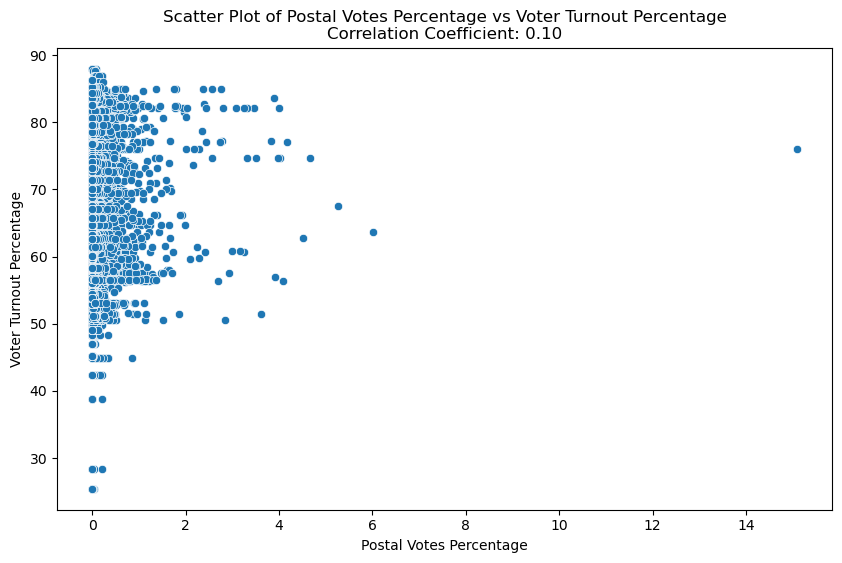

In [1547]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df3=df1.groupby('state').mean()

# Calculate Postal Votes Percentage
#df1['postal_votes_percentage'] = (df1['vtp2'] / df3['vt2']) * 100


# Calculate correlation
correlation = df1['vtp2'].corr(df1['VotersTurnoutRatio'])

# Print the correlation coefficient
print(f"The correlation coefficient between postal votes percentage and voter turnout percentage is: {correlation}")

# Plot the scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vtp2', y='VotersTurnoutRatio', data=df1)
plt.title(f'Scatter Plot of Postal Votes Percentage vs Voter Turnout Percentage\nCorrelation Coefficient: {correlation:.2f}')
plt.xlabel('Postal Votes Percentage')
plt.ylabel('Voter Turnout Percentage')
plt.show()



In [1548]:
df2.max()

C:\Users\chris\AppData\Local\Temp\ipykernel_17904\2766178128.py:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.max()


state                        West Bengal
pc_name                        Zahirabad
candidate                   ZULFICAR ALI
age                                 93.0
party                               ssrd
party_symbol                      Window
general_votes                     859973
postal_votes                        6792
total_votes                       863358
total_electors                   3183083
postal_votes_percentage        24.332978
voter_turnout_percentage       51.951012
party_vote_share               69.133886
dtype: object

# 1b

In [1549]:
df2_constitucies ['VotersTurnoutRatio']=(df2_constitucies['total_votes']/df2_constitucies['total_electors'])*100
df2=pd.merge(df2,df2_constitucies,on='pc_name',how='inner')
df2['vtp2']=(df2['postal_votes_x']/df2['total_votes_x'])*100

#df2

The correlation coefficient between postal votes percentage and voter turnout percentage is: 0.09614155975339153


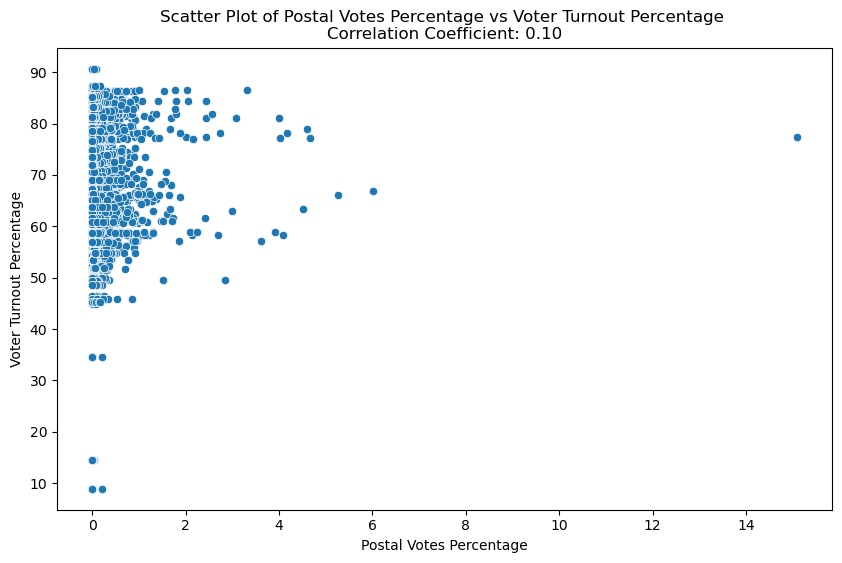

In [1550]:



# Calculate correlation
correlation = df2['vtp2'].corr(df2['VotersTurnoutRatio'])

# Print the correlation coefficient
print(f"The correlation coefficient between postal votes percentage and voter turnout percentage is: {correlation}")

# Plot the scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vtp2', y='VotersTurnoutRatio', data=df2)
plt.title(f'Scatter Plot of Postal Votes Percentage vs Voter Turnout Percentage \nCorrelation Coefficient: {correlation:.2f}')
plt.xlabel('Postal Votes Percentage')
plt.ylabel('Voter Turnout Percentage')
plt.show()



# 2

In [1551]:
gsdp=pd.read_csv('gsdp in millions 2014.csv')
gsdp=gsdp.loc[gsdp['GSDP 2014–15']!= '–']
gsdp['GSDP 2014–15']=pd.to_numeric(gsdp['GSDP 2014–15'])
gsdp.info()
gsdp['state']=gsdp['State/union territory']
gsdp=gsdp.drop(columns='State/union territory')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 34
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   State/union territory  34 non-null     object
 1   GSDP 2014–15           34 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 816.0+ bytes


In [1552]:
df1['state'] = df1['state'].str.strip()
gsdp['state'] = gsdp['state'].str.strip()


In [1553]:
df1['state'] = df1['state'].str.lower()
gsdp['state'] = gsdp['state'].str.lower()


In [1554]:
df1 = df1.dropna(subset=['state'])
gsdp = gsdp.dropna(subset=['state'])


In [1555]:
dfg=pd.merge(gsdp,df1,on='state',how='inner')

In [1556]:
#dfg

In [1557]:
correlation2 = dfg['VotersTurnoutRatio'].corr(dfg['GSDP 2014–15'])



In [1558]:
correlation2

-0.23234580763479243

In [1559]:
#gsdp

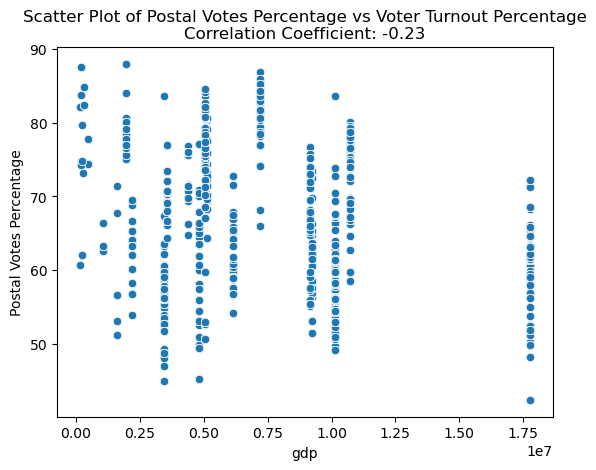

In [1560]:
#plt.figure(figsize=(10, 6))
sns.scatterplot(x='GSDP 2014–15', y='VotersTurnoutRatio', data=dfg)
plt.title(f'Scatter Plot of Postal Votes Percentage vs Voter Turnout Percentage\nCorrelation Coefficient: {correlation2:.2f}')
plt.xlabel('gdp')
plt.ylabel('Postal Votes Percentage')
plt.show()


#  2b 

In [1561]:
gsdp=pd.read_csv('gsdp in millions 2019.csv')
gsdp=gsdp.loc[gsdp['GSDP 2019–20']!= '–']
gsdp['GSDP 2019–20']=pd.to_numeric(gsdp['GSDP 2019–20'])
#gsdp.info()
gsdp['state']=gsdp['State/union territory']
gsdp=gsdp.drop(columns='State/union territory')

In [1562]:
df2['state'] = df2['state'].str.strip()
gsdp['state'] = gsdp['state'].str.strip()


In [1563]:


df2['state'] = df2['state'].str.lower()
gsdp['state'] = gsdp['state'].str.lower()


In [1564]:
df2 = df2.dropna(subset=['state'])
gsdp = gsdp.dropna(subset=['state'])


In [1565]:
dfg=pd.merge(gsdp,df2,on='state',how='inner')

In [1566]:
correlation = dfg['VotersTurnoutRatio'].corr(dfg['GSDP 2019–20'])


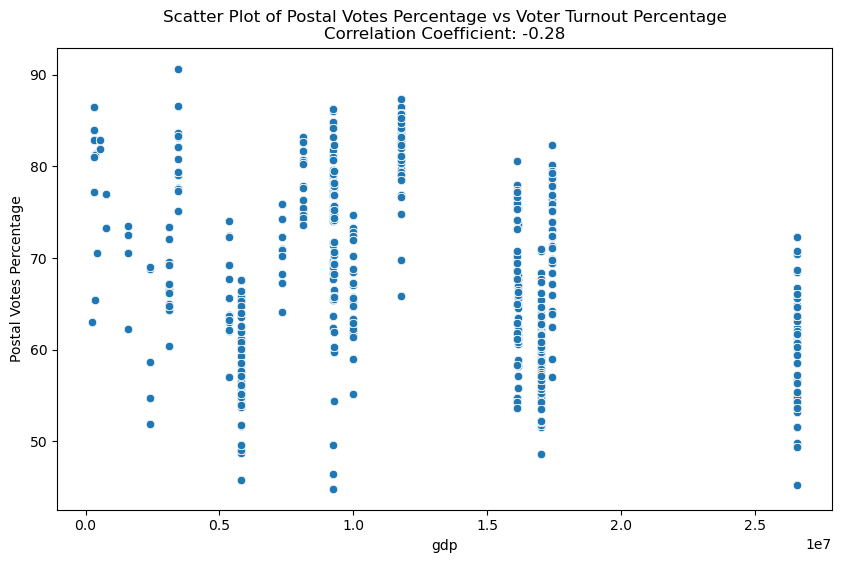

In [1567]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GSDP 2019–20', y='VotersTurnoutRatio', data=dfg)
plt.title(f'Scatter Plot of Postal Votes Percentage vs Voter Turnout Percentage\nCorrelation Coefficient: {correlation:.2f}')
plt.xlabel('gdp')
plt.ylabel('Postal Votes Percentage')
plt.show()

# 3

In [1568]:
literacy=pd.read_csv('literacy by state.csv')
literacy['Literacy']=literacy['Literacy'].astype(float)



In [1569]:
df2['state'] = df2['state'].str.strip()
literacy['state'] = literacy['state'].str.strip()


df2['state'] = df2['state'].str.lower()
literacy['state'] = literacy['state'].str.lower()




In [1570]:
dfl=pd.merge(literacy,df2,on='state')

In [1571]:
correlation=dfl['Literacy'].corr(dfl['VotersTurnoutRatio'])

In [1572]:
#dfl

In [1573]:
#dfl.info()

In [1574]:
#literacy

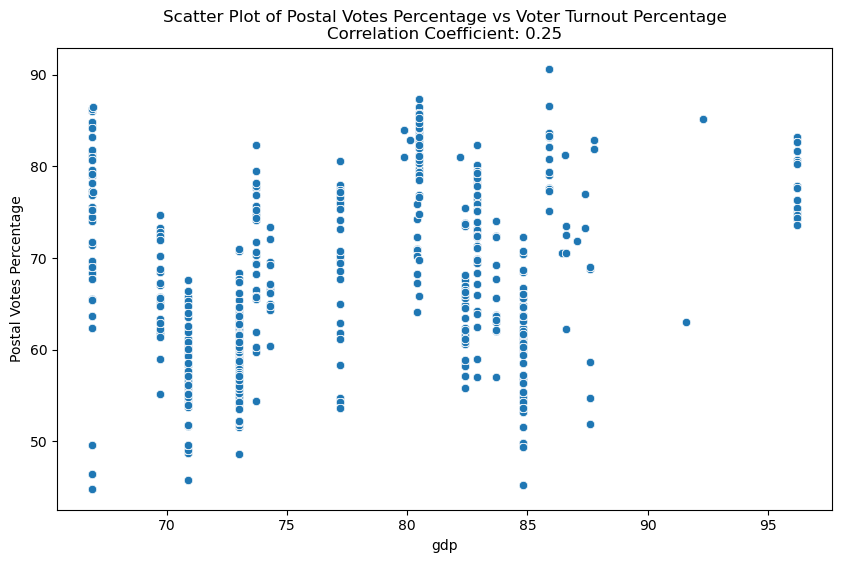

In [1575]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Literacy', y='VotersTurnoutRatio', data=dfl)
plt.title(f'Scatter Plot of Postal Votes Percentage vs Voter Turnout Percentage\nCorrelation Coefficient: {correlation:.2f}')
plt.xlabel('gdp')
plt.ylabel('Postal Votes Percentage')
plt.show()